In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_excel('Sample - EU Superstore.xls', sheet_name="Orders")
returns = pd.read_excel('Sample - EU Superstore.xls', sheet_name="Returns")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
#calculate average price of each product

average_price = df.groupby('Product ID')['Sales'].mean() / df.groupby('Product ID')['Quantity'].mean()

# add the average price to the dataframe for each product

df['Average Price'] = df['Product ID'].map(average_price)


In [5]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Average Price
0,1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,21.258947
1,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,43.985000
2,3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,11.730000
3,4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,21.781241
4,5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,81.984000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,ES-2015-3780358,2015-11-16,2015-11-19,First Class,CC-12100,Chad Cunningham,Home Office,Rovigo,Veneto,...,South,OFF-BI-10000346,Office Supplies,Binders,"Ibico 3-Hole Punch, Clear",59.82,2,0.0,23.88,28.193852
9996,9997,ES-2016-5371207,2016-01-25,2016-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,...,Central,OFF-BI-10002083,Office Supplies,Binders,"Acco Hole Reinforcements, Economy",6.66,1,0.0,0.57,6.660000
9997,9998,ES-2016-5371207,2016-01-25,2016-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,...,Central,OFF-SU-10003211,Office Supplies,Supplies,"Acme Ruler, Steel",96.66,6,0.0,28.98,16.110000
9998,9999,ES-2016-5371207,2016-01-25,2016-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,...,Central,TEC-PH-10001664,Technology,Phones,"Motorola Office Telephone, VoIP",502.95,7,0.0,221.13,58.939453


In [6]:
# check unique order ids in df
df['Order ID'].nunique(), df['Customer ID'].nunique(), df['Product ID'].nunique()

(4596, 795, 1915)

In [7]:
returned_order_ids = set(returns['Order ID'])
df['Churn'] = df['Order ID'].apply(lambda x: 'Yes' if x in returned_order_ids else 'No')
updated_orders_df_head = df.head()
updated_orders_df_head

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Average Price,Churn
0,1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,21.258947,No
1,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,43.985000,No
2,3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,11.730000,No
3,4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,21.781241,No
4,5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,81.984000,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10000 non-null  int64         
 1   Order ID       10000 non-null  object        
 2   Order Date     10000 non-null  datetime64[ns]
 3   Ship Date      10000 non-null  datetime64[ns]
 4   Ship Mode      10000 non-null  object        
 5   Customer ID    10000 non-null  object        
 6   Customer Name  10000 non-null  object        
 7   Segment        10000 non-null  object        
 8   City           10000 non-null  object        
 9   State          10000 non-null  object        
 10  Country        10000 non-null  object        
 11  Region         10000 non-null  object        
 12  Product ID     10000 non-null  object        
 13  Category       10000 non-null  object        
 14  Sub-Category   10000 non-null  object        
 15  Product Name   10000

In [9]:
df.drop(["Churn"], axis=1, inplace=True)

In [10]:
df.to_csv('updated_orders.csv', index=False)

In [3]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('updated_orders.csv')

d:\Anaconda\envs\pytorch\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


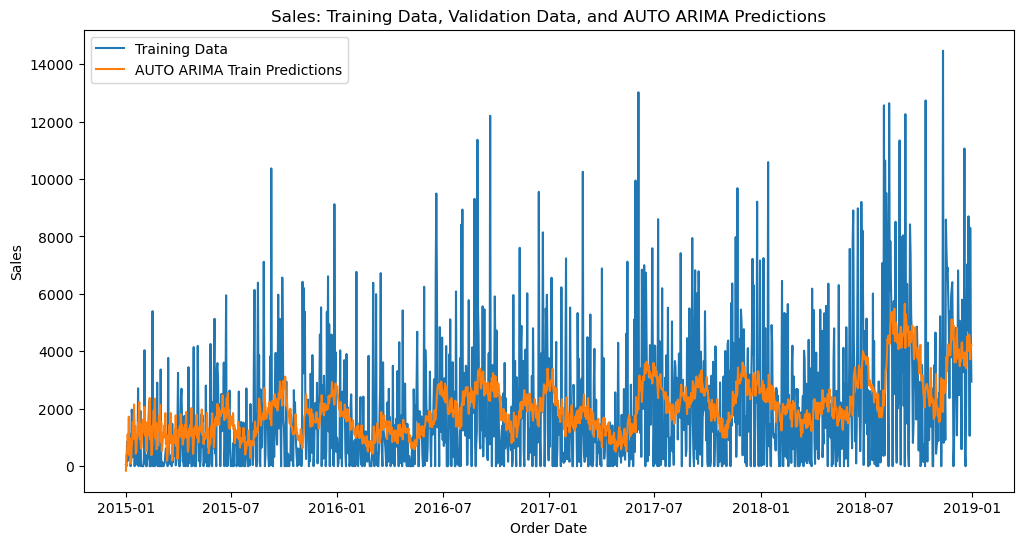

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Create a new DataFrame with 'Order Date' and 'Sales' columns
ts_data = df.groupby(pd.Grouper(freq='D'))['Sales'].sum()


# Fit the Holt-Winters model using an additive approach
model = ExponentialSmoothing(ts_data, seasonal='add', trend='add', seasonal_periods=9).fit()


# Make predictions using the AUTO ARIMA model
train_predictions = model.fittedvalues

# Plot the training data, validation data, and AUTO ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Training Data')
plt.plot(pd.Series(train_predictions, index=ts_data.index), label='AUTO ARIMA Train Predictions')
plt.legend()
plt.title('Sales: Training Data, Validation Data, and AUTO ARIMA Predictions')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [6]:
last_date = ts_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=91, freq='D')  # 6 months = approximately 183 days
future_predictions = model.forecast(len(future_dates))

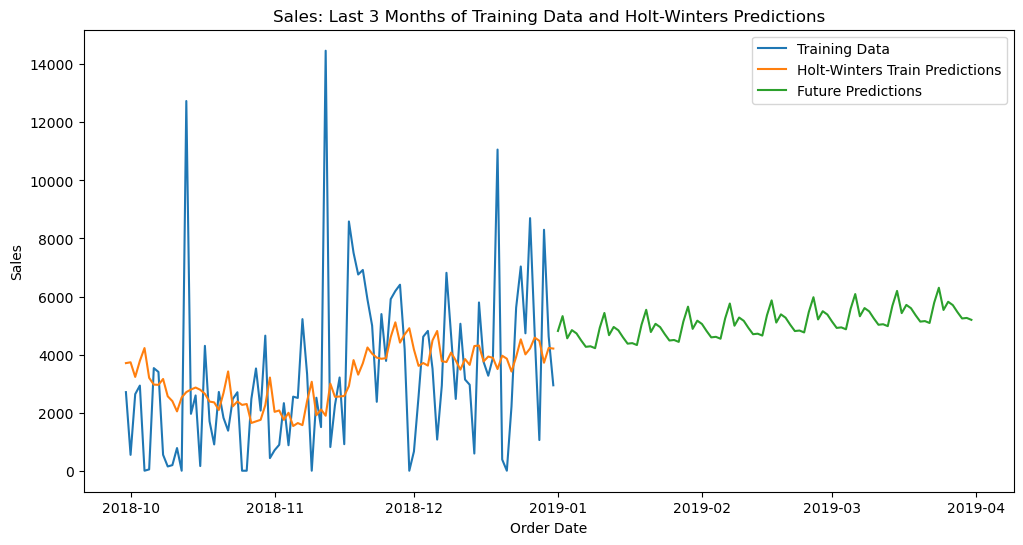

In [7]:
last_3_months = ts_data.index[-1] - pd.DateOffset(months=3)
train_data_last_3_months = ts_data[last_3_months:]
train_predictions_last_3_months = pd.Series(train_predictions, index=ts_data.index)[last_3_months:]
future_predictions_last_3_months = pd.Series(future_predictions, index=future_dates)[:91]  # For 3 months

# Plot the last 3 months of training data, validation data, and AUTO ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data_last_3_months, label='Training Data')
plt.plot(train_predictions_last_3_months, label='Holt-Winters Train Predictions')
plt.plot(future_predictions_last_3_months, label='Future Predictions')
plt.legend()
plt.title('Sales: Last 3 Months of Training Data and Holt-Winters Predictions')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [8]:
#Customer Segmentation

df = pd.read_csv('updated_orders.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Average Price
0,1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,21.258947
1,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,43.985000
2,3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,11.730000
3,4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,21.781241
4,5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,...,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,81.984000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,ES-2015-3780358,2015-11-16,2015-11-19,First Class,CC-12100,Chad Cunningham,Home Office,Rovigo,Veneto,...,South,OFF-BI-10000346,Office Supplies,Binders,"Ibico 3-Hole Punch, Clear",59.82,2,0.0,23.88,28.193852
9996,9997,ES-2016-5371207,2016-01-25,2016-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,...,Central,OFF-BI-10002083,Office Supplies,Binders,"Acco Hole Reinforcements, Economy",6.66,1,0.0,0.57,6.660000
9997,9998,ES-2016-5371207,2016-01-25,2016-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,...,Central,OFF-SU-10003211,Office Supplies,Supplies,"Acme Ruler, Steel",96.66,6,0.0,28.98,16.110000
9998,9999,ES-2016-5371207,2016-01-25,2016-01-29,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,...,Central,TEC-PH-10001664,Technology,Phones,"Motorola Office Telephone, VoIP",502.95,7,0.0,221.13,58.939453


In [9]:
def correct_age_assignment(segment, category):
    # Example adjustments for age based on segment and category - these can be refined
    segment_age_adjustment = {
        'Consumer': 0,  # Base age range for consumers
        'Corporate': 5,  # Assuming corporate customers might be slightly older on average
        'Home Office': 3  # Home office might indicate a mid-range age
    }
    category_age_adjustment = {
        'Technology': 5,  # Technology enthusiasts might be younger
        'Furniture': 10,  # Furniture might indicate older customers, possibly homeowners
        'Office Supplies': 0  # No specific age adjustment for office supplies
    }
    base_age = 22  # Starting point for age
    age = base_age + segment_age_adjustment.get(segment, 0) + category_age_adjustment.get(category, 0)
    return np.random.randint(age, age + 20)  # Adding variability within a 20-year range

In [13]:
from collections import Counter
category_popularity = Counter(df['Sub-Category'])
max_stock = 500
min_stock = 100
def assign_stock(category):
    # Normalize stock levels based on category popularity.
    total_categories = len(category_popularity)
    rank = list(category_popularity).index(category) + 1  # Assuming sorted by popularity in Counter
    return max_stock - ((rank - 1) / (total_categories - 1)) * (max_stock - min_stock)

In [14]:
def refine_gender(name):
    common_female_endings = ('a', 'e', 'i', 'y', 'l')
    common_male_endings = ('n', 'o', 'r', 's', 't', 'd', 'm')

    if name[-1].lower() in common_female_endings:
        return 'Female'
    elif name[-1].lower() in common_male_endings:
        return 'Male'
    else:
        # Making an educated guess if the name ends with other letters
        if len(name) > 6:  # Assuming longer names might be more feminine
            return 'Female'
        else:
            return 'Male'

In [15]:
df['corrected_age'] = df.apply(lambda row: correct_age_assignment(row['Segment'], row['Category']), axis=1)
df['corrected_stock'] = df['Sub-Category'].apply(assign_stock)
df['corrected_gender'] = df['Customer Name'].apply(refine_gender)

In [16]:
df.to_csv('Testing.csv', index=False)

In [17]:
# Aggregate necessary features
# Total Order Amount
total_order_amount = df.groupby('Customer ID')['Sales'].sum()

# Most Ordered Category
most_ordered_category = df.groupby('Customer ID')['Sub-Category'].agg(lambda x: x.mode()[0])

# Order Frequency
order_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Combining Gender and Age (Assuming one record per customer is representative for these attributes)
customer_info = df.groupby('Customer ID').agg({
    'corrected_gender': 'first',
    'corrected_age': 'first'
}).reset_index()

# Combine all features into a single dataframe
features_df = pd.DataFrame({
    'Customer ID': customer_info['Customer ID'],
    'Gender': customer_info['corrected_gender'],
    'Age': customer_info['corrected_age'],
    'Total Order Amount': total_order_amount,
    'Most Ordered Category': most_ordered_category,
    'Order Frequency': order_frequency
}).reset_index(drop=True)

# Display the first few rows to verify
features_df.head()


,Customer ID,Gender,Age,Total Order Amount,Most Ordered Category,Order Frequency
0,AA-10315,Female,26.0,NaN,NaN,NaN
1,AA-10375,Male,37.0,NaN,NaN,NaN
2,AA-10480,Male,38.0,NaN,NaN,NaN
3,AA-10645,Female,27.0,NaN,NaN,NaN
4,AB-10015,Male,29.0,NaN,NaN,NaN


In [18]:
# Correcting the merging process to include all aggregated features properly

# Merging total order amount, most ordered category, and order frequency with customer_info
features_df_corrected = customer_info.merge(total_order_amount, on='Customer ID', how='left')\
                                     .merge(most_ordered_category, on='Customer ID', how='left', suffixes=('', '_most_ordered'))\
                                     .merge(order_frequency, on='Customer ID', how='left')

# Renaming columns to match the desired structure
features_df_corrected.columns = ['Customer ID', 'Gender', 'Age', 'Total Order Amount', 'Most Ordered Category', 'Order Frequency']

# Display the corrected dataframe
features_df_corrected.head()


,Customer ID,Gender,Age,Total Order Amount,Most Ordered Category,Order Frequency
0,AA-10315,Female,26,6105.6270,Phones,7
1,AA-10375,Male,37,560.0820,Art,3
2,AA-10480,Male,38,5254.4565,Storage,7
3,AA-10645,Female,27,2730.2070,Storage,9
4,AB-10015,Male,29,6116.4540,Labels,12


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining columns to be processed
categorical_cols = ['Gender', 'Most Ordered Category']
numerical_cols = ['Age', 'Total Order Amount', 'Order Frequency']

# Creating transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fitting the preprocessor and transforming the features dataframe
X_processed = preprocessor.fit_transform(features_df_corrected)

X_processed.shape


d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

(795, 21)

d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


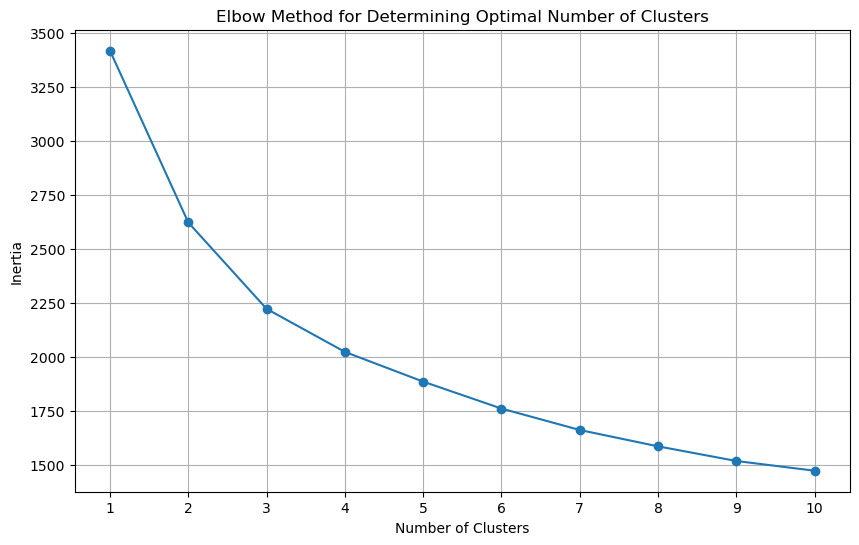

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [21]:
# Applying K-means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(X_processed)

# Applying K-means clustering with 4 clusters for comparison
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_processed)

# Adding the cluster labels to the original dataframe for analysis
features_df_corrected['Cluster (3)'] = clusters_3
features_df_corrected['Cluster (4)'] = clusters_4

features_df_corrected.head()


,Customer ID,Gender,Age,Total Order Amount,Most Ordered Category,Order Frequency,Cluster (3),Cluster (4)
0,AA-10315,Female,26,6105.6270,Phones,7,1,1
1,AA-10375,Male,37,560.0820,Art,3,0,3
2,AA-10480,Male,38,5254.4565,Storage,7,1,0
3,AA-10645,Female,27,2730.2070,Storage,9,2,1
4,AB-10015,Male,29,6116.4540,Labels,12,1,2


In [22]:
# Statistical Summary for 3-Cluster Solution
stat_summary_3 = features_df_corrected.groupby('Cluster (3)').agg({
    'Age': ['mean', 'median'],
    'Total Order Amount': ['mean', 'median'],
    'Order Frequency': ['mean', 'median'],
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Customer Count'})

# Statistical Summary for 4-Cluster Solution
stat_summary_4 = features_df_corrected.groupby('Cluster (4)').agg({
    'Age': ['mean', 'median'],
    'Total Order Amount': ['mean', 'median'],
    'Order Frequency': ['mean', 'median'],
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Customer Count'})

stat_summary_3, stat_summary_4

(                   Age        Total Order Amount           Order Frequency  \
                   mean median               mean    median            mean   
 Cluster (3)                                                                  
 0            42.207885   41.0        2685.507070  2645.472        5.569892   
 1            35.995215   37.0        6631.653998  6430.176        9.095694   
 2            29.895765   30.0        2615.038774  2395.056        5.426710   
 
                    Customer Count  
             median          count  
 Cluster (3)                        
 0              6.0            279  
 1              9.0            209  
 2              5.0            307  ,
                    Age        Total Order Amount            Order Frequency  \
                   mean median               mean     median            mean   
 Cluster (4)                                                                   
 0            42.733990   42.0        3653.880990  3641.7045 

In [23]:
from datetime import datetime
import numpy as np

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create additional time-related features
df['Day of Week'] = df['Order Date'].dt.dayofweek
df['Month'] = df['Order Date'].dt.month
# Assuming the dataset does not specify holidays, so this feature will be excluded

# Aggregate daily sales for each product
daily_sales = df.groupby(['Order Date', 'Product Name', 'Sub-Category', 'Day of Week', 'Month'])['Quantity'].sum().reset_index()

# Join the customer segmentation result with daily sales data
# Since the segmentation is at the customer level, we need to approximate it for product sales. 
# This could be done by assigning the most common cluster to each sale based on the customer ID of that sale.
# Here, for simplicity, we will exclude direct cluster integration and focus on time and product features.

# Check the prepared data
daily_sales.head()

,Order Date,Product Name,Sub-Category,Day of Week,Month,Quantity
0,2015-01-01,"Enermax Note Cards, Premium",Paper,3,1,3
1,2015-01-03,"Dania Corner Shelving, Traditional",Bookcases,5,1,7
2,2015-01-04,"Binney & Smith Sketch Pad, Easy-Erase",Art,6,1,3
3,2015-01-04,"Boston Markers, Easy-Erase",Art,6,1,2
4,2015-01-04,"Eldon Folders, Single Width",Storage,6,1,2


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Encoding categorical variables using OneHotEncoder within a ColumnTransformer
categorical_features = ['Product Name', 'Sub-Category']
numerical_features = ['Day of Week', 'Month']

preprocessor_for_model = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = daily_sales.drop('Quantity', axis=1)
y = daily_sales['Quantity']

# Apply preprocessing
X_processed = preprocessor_for_model.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate RMSE
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Anaconda\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

2.1726989035619706